In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Training Data Preprocessing

In [29]:
train = pd.read_csv("data/train.csv")

In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
train.shape

(891, 12)

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Dropping unnecessary columns
train.drop(columns=["Name","Cabin","Ticket"], inplace= True)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [ ]:
# Handling missing values in training set
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

/var/folders/ft/_y1rfzsj46x1510x4yv6fqzw0000gn/T/ipykernel_31007/648336700.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
/var/folders/ft/_y1rfzsj46x1510x4yv6fqzw0000gn/T/ipykernel_31007/648336700.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

#### Data Visualization

/var/folders/ft/_y1rfzsj46x1510x4yv6fqzw0000gn/T/ipykernel_31007/2797084510.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train, palette='viridis')


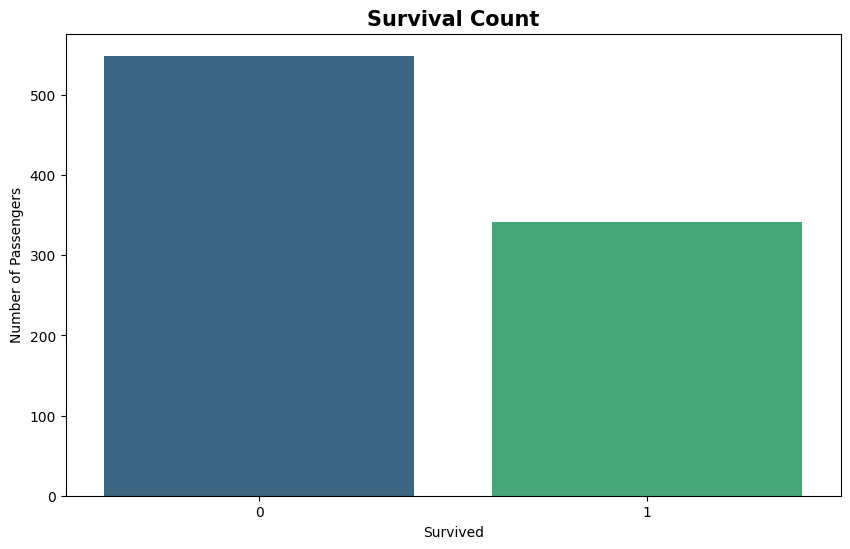

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Survived', data=train, palette='viridis')
plt.ylabel('Number of Passengers')
plt.title('Survival Count', fontweight='bold', fontsize=15)
plt.show()

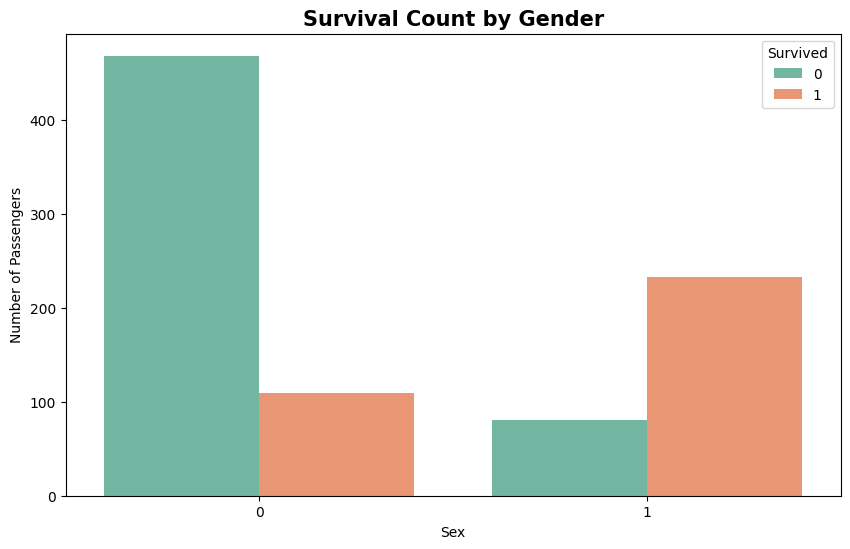

In [71]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sex', hue='Survived', data=train, palette='Set2')
plt.ylabel('Number of Passengers')
plt.title('Survival Count by Gender', fontweight='bold', fontsize=15)
plt.show()

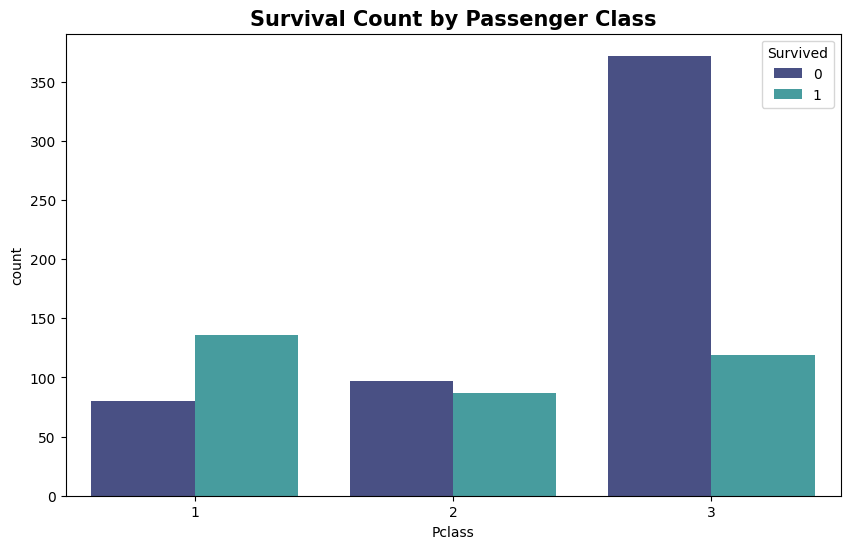

In [66]:
plt.figure(figsize=(10,6))
sns.countplot(x='Pclass', hue='Survived', data=train, palette='mako')
plt.title('Survival Count by Passenger Class', fontweight='bold', fontsize=15)
plt.show()

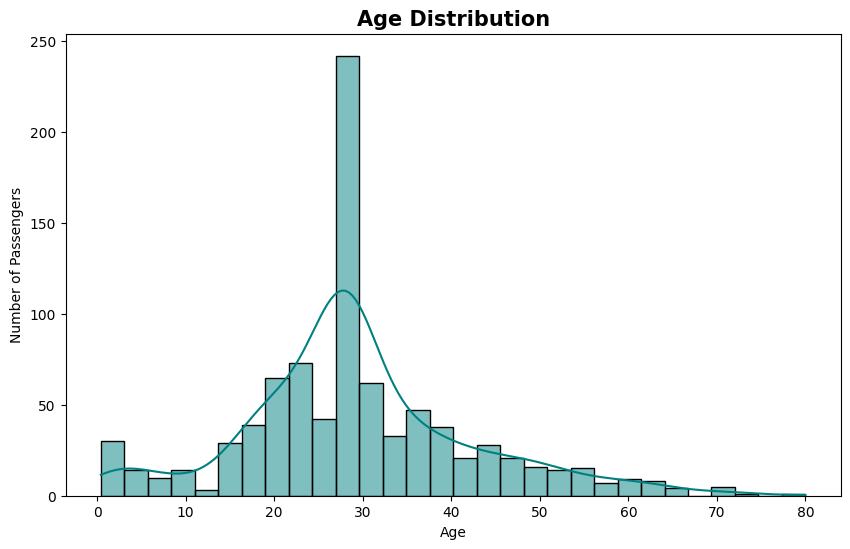

In [65]:
plt.figure(figsize=(10,6))
sns.histplot(train['Age'], bins=30, kde=True, color='teal')
plt.ylabel('Number of Passengers')
plt.title('Age Distribution', fontweight='bold', fontsize=15)
plt.show()

In [73]:
def plot_percentage(df, plot, x_push=0.15, y_push=20):
    df = df.copy()
    cs = df.columns
    df['sum'] = df.sum(axis=1)
    for c in cs:
        df[c] = 100*df[c]/(df['sum'] + 1e-10)
    df.drop(columns='sum', inplace=True)
    df = df.to_numpy().T.ravel()
    for n, i in enumerate(plot.axes.patches):
        plot.axes.text(i.get_x()+x_push, i.get_y()+y_push, f'{df[n].round(2)}%')

/var/folders/ft/_y1rfzsj46x1510x4yv6fqzw0000gn/T/ipykernel_31007/4129841833.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = train[['Age', 'Survived']].groupby(


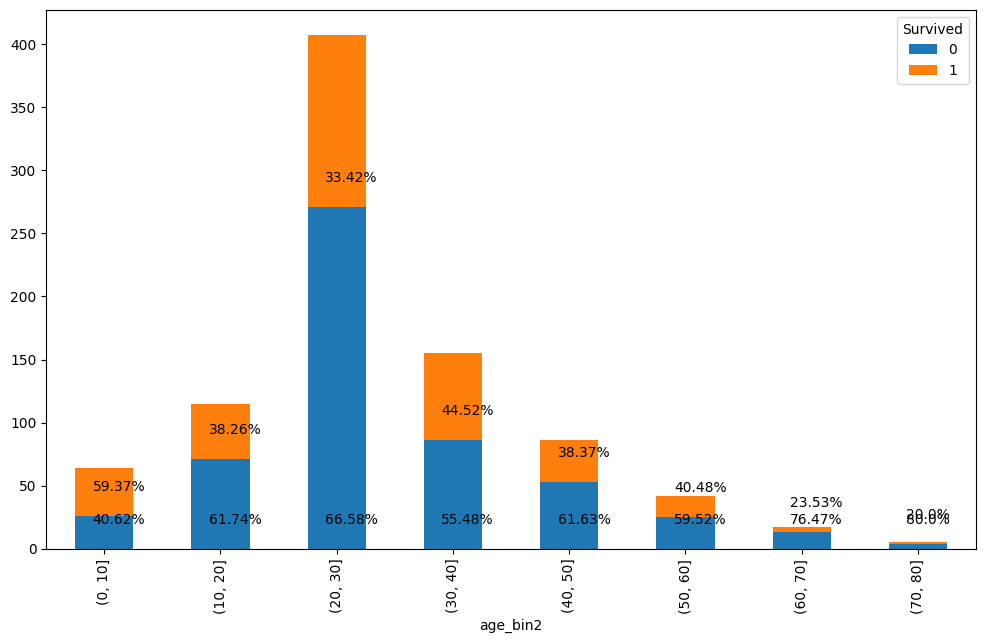

In [74]:
train['age_bin2'] = pd.cut(train["Age"], np.arange(0, 90, 10))
df = train[['Age', 'Survived']].groupby(
    [train['age_bin2'], 'Survived']
).size().reset_index().pivot(index='age_bin2', columns=['Survived'], values=0)

df_plot = df.plot(kind='bar', stacked=True, figsize=(12, 7))
plot_percentage(df, df_plot)
plt.show()

In [ ]:
# Converting non-integer values to integer in training set
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [40]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


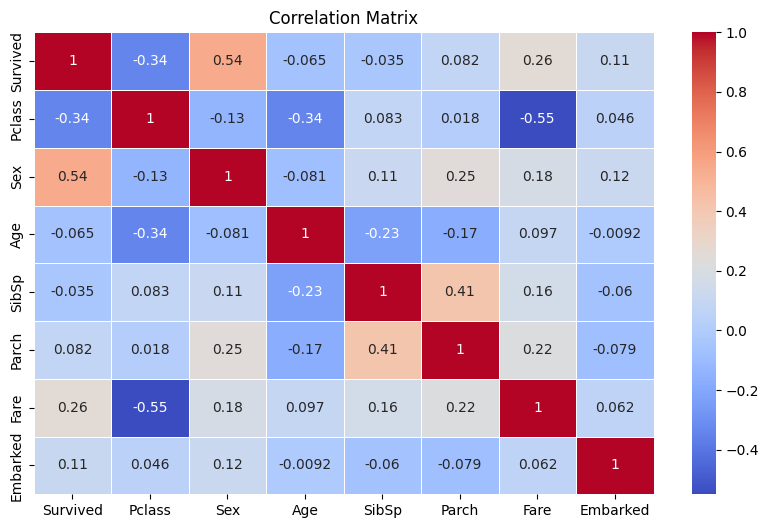

In [72]:
# Correlation matrix of training set
plt.figure(figsize=(10,6))
sns.heatmap(train.drop(['PassengerId'], axis=1).corr(),  cmap='coolwarm', annot=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [51]:
train.to_csv("data/cleaned_train.csv", index=False)

### Testing Data Preprocessing

In [54]:
test = pd.read_csv("data/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [55]:
test.drop(columns=["Name", "Cabin", "Ticket"], inplace=True)

In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [ ]:
# Handling missing values in test set
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)

/var/folders/ft/_y1rfzsj46x1510x4yv6fqzw0000gn/T/ipykernel_31007/1359732817.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Age'].fillna(test['Age'].median(), inplace=True)
/var/folders/ft/_y1rfzsj46x1510x4yv6fqzw0000gn/T/ipykernel_31007/1359732817.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [60]:
# Converting non-integer values to integer
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})
test['Embarked'] = test['Embarked'].map({'S': 0, 'C':1 , 'Q':2})

In [62]:
test.to_csv('data/cleaned_test.csv', index=False)